In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, cluster

In [77]:
class Dataset():
    """
    The dataset class. It creates a synthetic dataset for classification/clustering. 
    n_samples = number of samples in dataset
    n_informative = number of informative feastures
    
    The method add_unrelated_features adds add_n_features features to the exsisting dataset,
    so that the informative features are at the first positions. The unrelated features are 
    randomly distributed either uniformly or gaussian.
    """
    def __init__(self, n_samples, n_informative, random_state=1):
        
        data = datasets.make_classification(n_samples=n_samples, n_features=n_informative, n_informative=n_informative, 
                                        n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, 
                                        class_sep=2, hypercube=True, shift=0.0, scale=1.0, shuffle=False,
                                        random_state=random_state)
        self.X = data[0]
        self.Y = data[1]
        self.n_samples = self.X.shape[0]
        self.n_attributes = self.X.shape[1]
        self.n_informative = n_informative

    
    def add_unrelated_features(self, add_n_features, distribution, plot=False):
        total_features = self.n_attributes + add_n_features 
        
        new_X = np.zeros(shape=(self.n_samples, total_features))

        for i in range(self.n_samples):
            
            if distribution == 'uniform':
                new_X[i] = np.append(self.X[i], np.random.uniform(-1.5,1.5, size=(add_n_features)))
            if distribution == 'normal':
                new_X[i] = np.append(self.X[i], np.random.normal(size=add_n_features, scale=1))

        self.X = new_X
        self.n_attributes = self.X.shape[1]
        
        if plot==True:
            fig, ax = plt.subplots()
            ax.set_title(f'The distribution of the added non-informative attributes. \n Here {distribution} distribution.')
            plt.hist(np.concatenate(self.X[:,self.n_informative:]))
    
def kmeans(data, k):
     
    clust = cluster.KMeans(k).fit(data.X)
    
    fig, ax = plt.subplots()
    ax.set_title(f'K-means clustering, {data.n_informative} informative features \n. \
                {data.n_attributes - data.n_informative} non informative features')
    plt.scatter(data.X[:][:,0],data.X[:][:,1], c=clust.labels_)
    
def hierarchical_clustering(data, max_depth):
    clust = cluster.AgglomerativeClustering(4).fit(data.X)
    fig, ax = plt.subplots()
    ax.set_title(f'Hierarchical clustering, {data.n_informative} informative features \n. \
                {data.n_attributes - data.n_informative} non informative features')
    plt.scatter(data.X[:][:,0],data.X[:][:,1], c=clust.labels_)


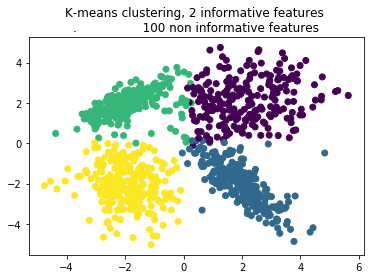

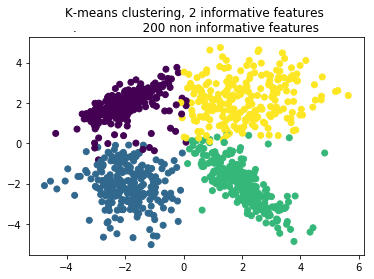

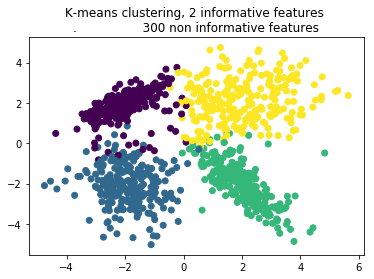

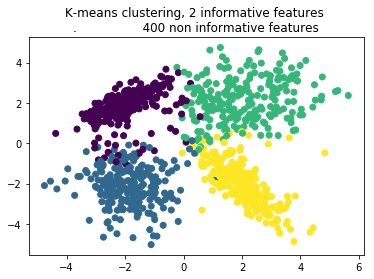

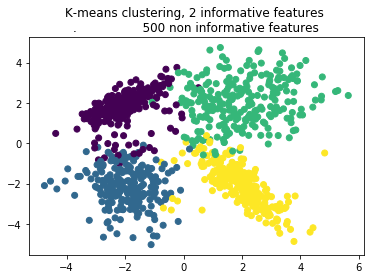

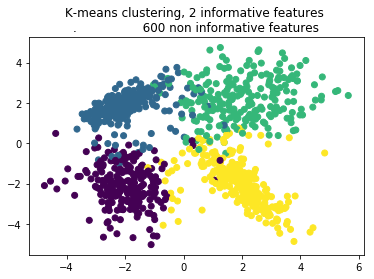

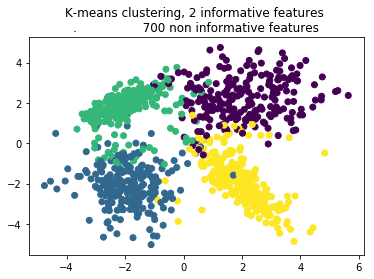

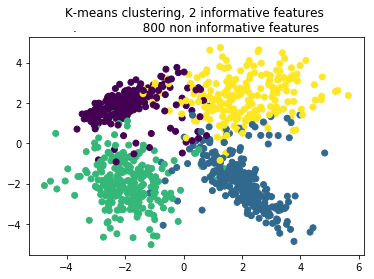

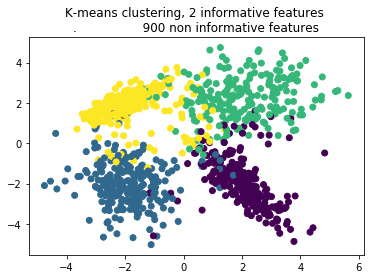

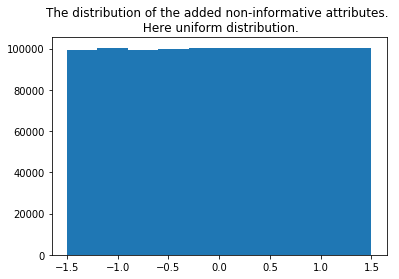

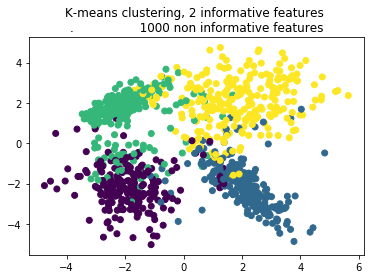

In [74]:
data = Dataset(1000,2)

for i in range(10):
    if i ==9:
        data.add_unrelated_features(100, 'uniform', True)
    else:
        data.add_unrelated_features(100, 'uniform', False)
    kmeans(data,4)

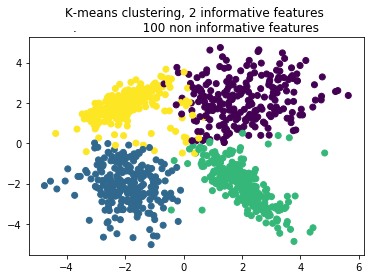

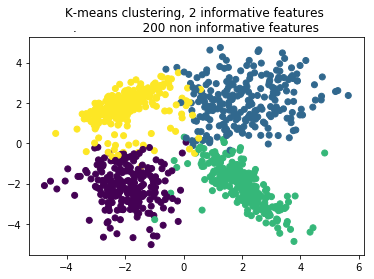

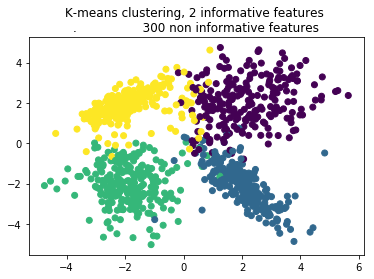

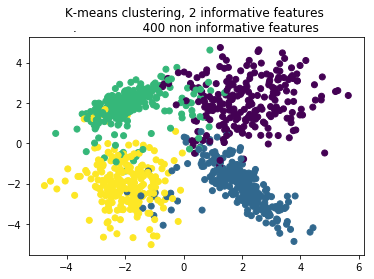

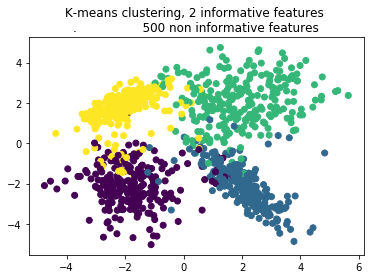

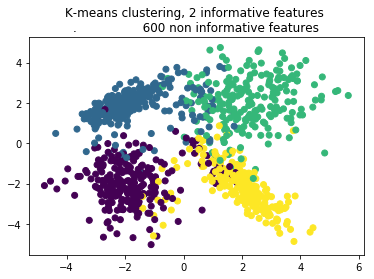

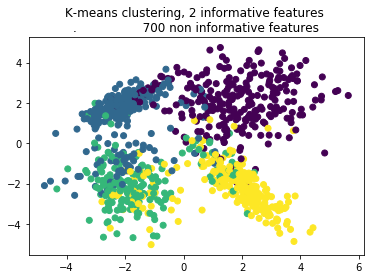

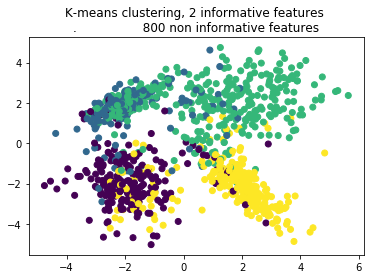

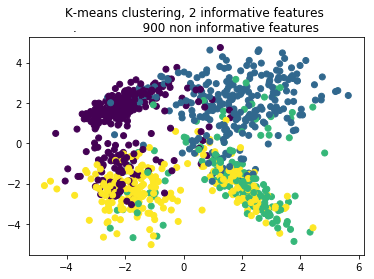

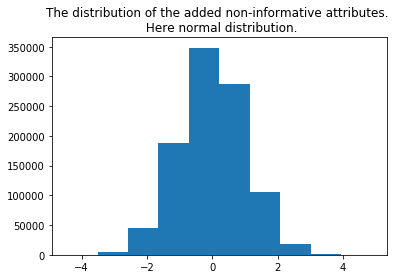

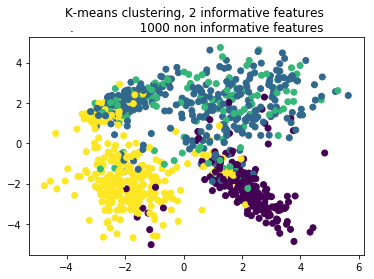

In [71]:
data = Dataset(1000,2)

for i in range(10):
    if i == 9:
        data.add_unrelated_features(100, 'normal', True)
    else:
        data.add_unrelated_features(100, 'normal', False)
    kmeans(data,4)

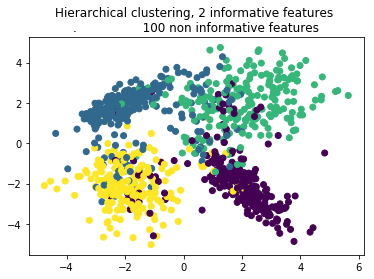

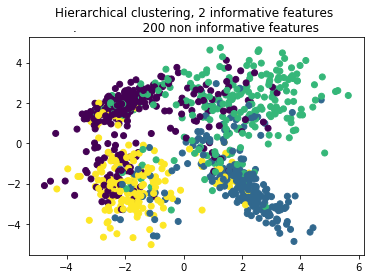

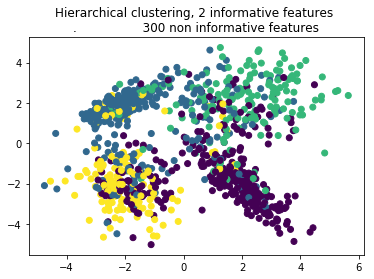

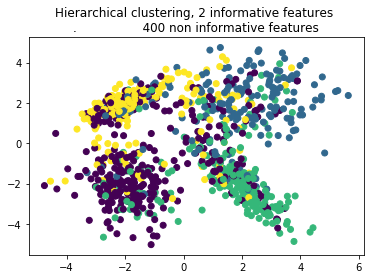

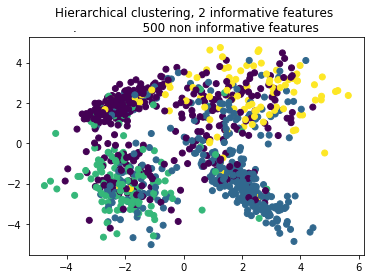

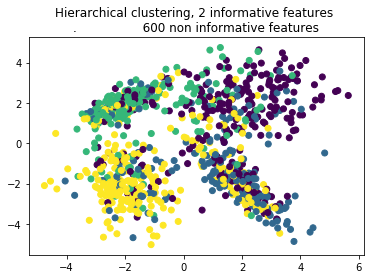

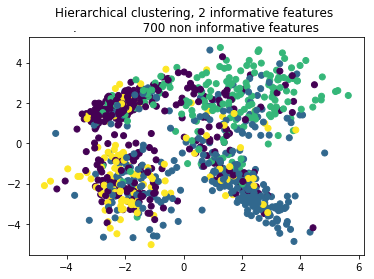

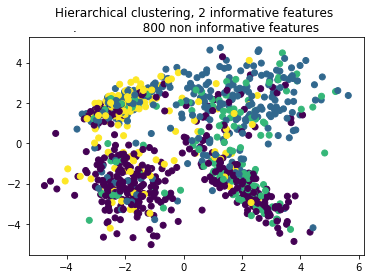

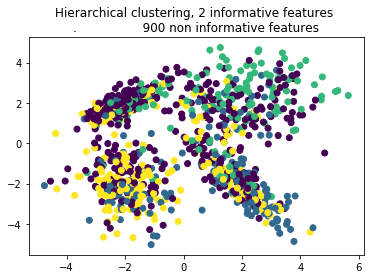

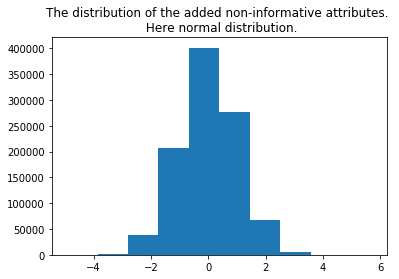

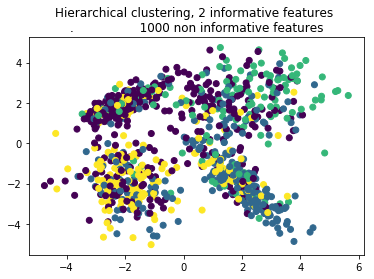

In [78]:
data = Dataset(1000,2)

for i in range(10):
    if i == 9:
        data.add_unrelated_features(100, 'normal', True)
    else:
        data.add_unrelated_features(100, 'normal', False)
    hierarchical_clustering(data,4)

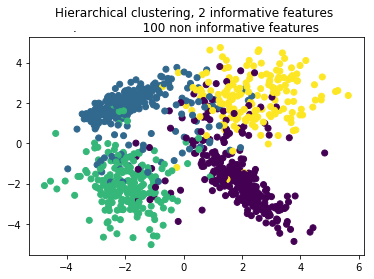

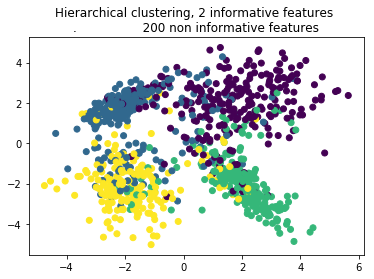

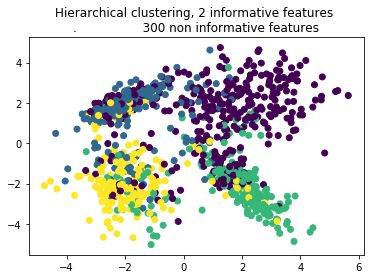

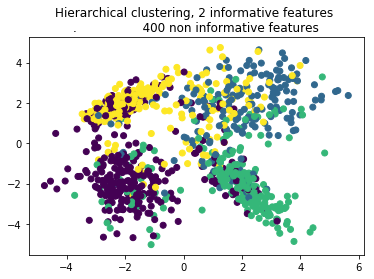

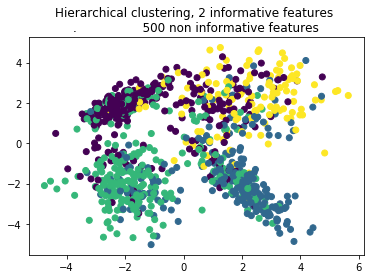

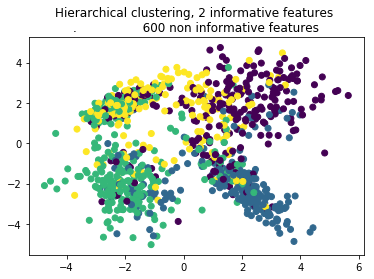

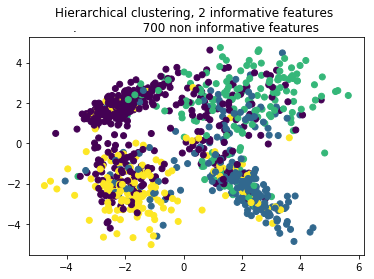

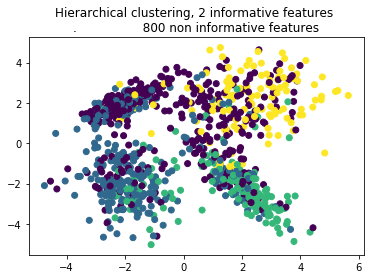

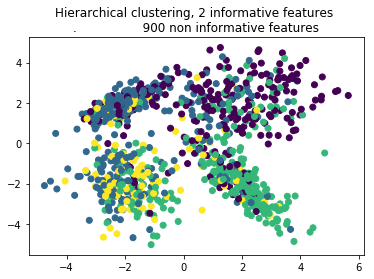

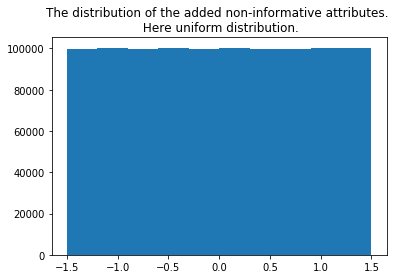

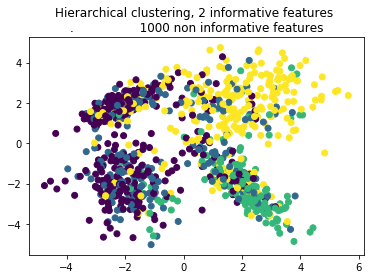

In [79]:
data = Dataset(1000,2)

for i in range(10):
    if i == 9:
        data.add_unrelated_features(100, 'uniform', True)
    else:
        data.add_unrelated_features(100, 'uniform', False)
    hierarchical_clustering(data,4)